In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import ISLP
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)
from ISLP import confusion_tablea
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
import seaborn as sns
import itertools

In [16]:
np.random.seed(42)
X = np.random.normal(size=(20, 1000))
noise = np.random.normal(size=1000)
B = 1.2 * np.random.uniform(size=20)
B[2], B[6], B[7], B[12], B[17] = 0, 0 ,0 ,0 ,0
y = B @ X + noise

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.9, random_state=42)

In [63]:
num_predictors = X_train.shape[1]
best_models = []
best_mse = []
for i in range(1,num_predictors+1):
    print(i)
    combinations = itertools.combinations(range(num_predictors), i)
    best_score = float("inf")
    best_model = None
    for subset in combinations:
        subset_train = X_train[:,subset]
        y_pred = LinearRegression().fit(subset_train, y_train).predict(subset_train)
        train_mse = mean_squared_error(y_pred, y_train)
        if train_mse < best_score:
            best_score = train_mse
            best_model = subset
    best_models.append(best_model)
    best_mse.append(train_mse)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [64]:
test_mses = []
for subset in best_models:
    subset_test = X_test[:,subset]
    subset_train = X_train[:,subset]
    y_pred = LinearRegression().fit(subset_train, y_train).predict(subset_test)
    test_mse = mean_squared_error(y_pred, y_test)
    test_mses.append(test_mse)

<Axes: >

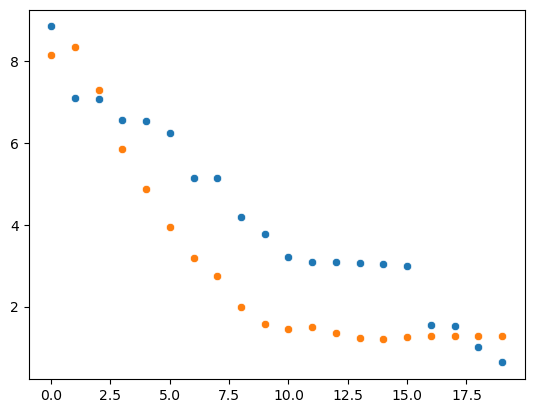

In [65]:
sns.scatterplot(x=range(20), y=best_mse)
sns.scatterplot(x=range(20), y=test_mses)

In [107]:
best_subset = best_models[14]
subset_train = X_train[:,best_subset]
model = LinearRegression().fit(subset_train, y_train)

In [135]:
deviations = []
for subset in best_models:
    subset_train = X_train[:,subset]
    model = LinearRegression().fit(subset_train, y_train)
    coeff = np.zeros(20)
    coeff[list(subset)] = model.coef_
    deviation = np.sqrt(np.sum((B-coeff)**2))
    deviations.append(deviation)

<Axes: >

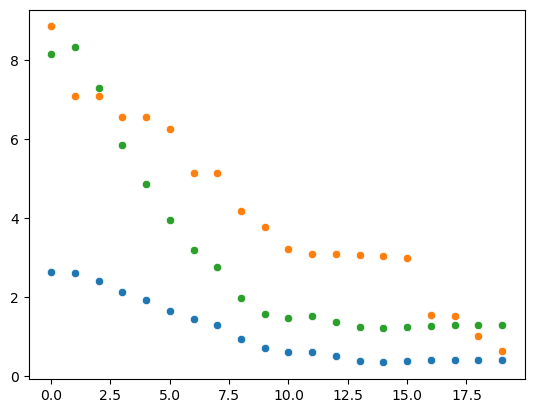

In [144]:
sns.scatterplot(x=range(20), y=deviations)
sns.scatterplot(x=range(20), y=best_mse)
sns.scatterplot(x=range(20), y=test_mses)